In [139]:
import glob
import model_sorter
reload(model_sorter)
from model_sorter import *

In [156]:
models = model_sorter.loadAllResults(glob.glob('./models/android/*'))

  0%|          | 0/3920 [00:00<?, ?it/s]

Loading test result pickles ...


100%|██████████| 3920/3920 [05:30<00:00, 11.85it/s]


In [157]:
for m in models:
    m['scores'] = model_sorter.scores(m)


In [153]:
import os
model_files = glob.glob('./models/android/*/*.cv')
latest = sorted(model_files, key=lambda f: os.path.getmtime(f), reverse=True)
filenames = latest[:6]
dirnames = [os.path.dirname(fn) for fn in filenames]
newmodels = model_sorter.loadAllResults(dirnames)
print len(newmodels)

100%|██████████| 6/6 [00:00<00:00, 32.50it/s]

Loading test result pickles ...


6


python parallel_training.py -p android --no-split --sample-count-multiple 1e-05,1e-3,5e-5 --max-tree-count 9,40,7 --epsilon 1e-5,1e-3,7e-5

python parallel_training.py -p android --no-split --sample-count-multiple 1e-05 --max-tree-count 6,12,1 --epsilon 1e-5

In [173]:
{
    'epsilons': set(m['config']['builder']['epsilon'] for m in models),
    'multiples': set(m['config']['builder']['sample_count_multiple'] for m in models),
    'active_var_counts': set(m['config']['builder']['active_var_count'] for m in models),
}

{'active_var_counts': {4, 5, 6, 7, 8, 9, 10},
 'epsilons': {1e-05, 0.00051},
 'multiples': {1e-05,
  0.00041000000000000005,
  0.0008100000000000001,
  0.0012100000000000001,
  0.00161,
  0.00201,
  0.0024100000000000002,
  0.00281,
  0.00321,
  0.0036100000000000004,
  0.00401,
  0.00441,
  0.00481,
  0.00521,
  0.0056099999999999995,
  0.00601,
  0.00641,
  0.00681,
  0.00721,
  0.00761}}

In [162]:
len([m for m in models if m['scores']['bike_correct'] >= 45])

196

In [163]:
import json
for m in [m for m in models if m['scores']['bike_correct'] >= 42 and m['MB'] <=75]:
    print json.dumps(m['config']['builder'], indent=2)
    print json.dumps(m['scores'], indent=2)
    print m['MB']
    print ''

{
  "active_var_count": 10, 
  "epsilon": 1e-05, 
  "max_tree_count": 6, 
  "sample_count_multiple": 1e-05
}
{
  "bike_predicted_foot": 6, 
  "motor_predicted_motor": 214, 
  "foot_predicted_bike": 26, 
  "bike_predicted_others": 50, 
  "bike_correct": 47, 
  "others_predicted_bike": 98
}
27

{
  "active_var_count": 10, 
  "epsilon": 0.00051, 
  "max_tree_count": 15, 
  "sample_count_multiple": 1e-05
}
{
  "bike_predicted_foot": 6, 
  "motor_predicted_motor": 217, 
  "foot_predicted_bike": 25, 
  "bike_predicted_others": 51, 
  "bike_correct": 46, 
  "others_predicted_bike": 94
}
69

{
  "active_var_count": 9, 
  "epsilon": 1e-05, 
  "max_tree_count": 15, 
  "sample_count_multiple": 1e-05
}
{
  "bike_predicted_foot": 5, 
  "motor_predicted_motor": 220, 
  "foot_predicted_bike": 26, 
  "bike_predicted_others": 50, 
  "bike_correct": 45, 
  "others_predicted_bike": 94
}
69

{
  "active_var_count": 5, 
  "epsilon": 0.00051, 
  "max_tree_count": 14, 
  "sample_count_multiple": 1e-05
}
{
  

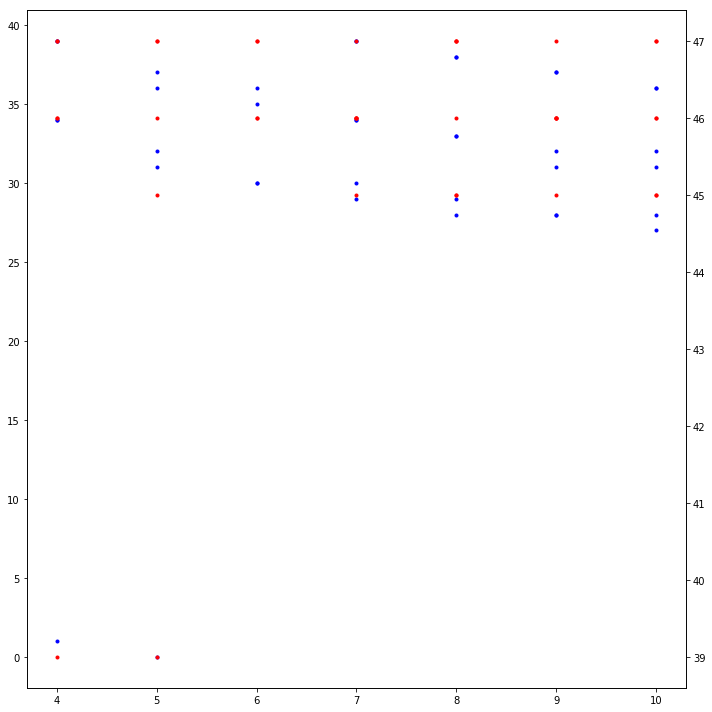

In [203]:
import matplotlib.pyplot as plt
import mpld3

plotting = [m for m in models if
            m['scores']['bike_correct'] >= 39
           and m['MB'] < 40]
# plotting = models
# y = [m['scores']['bike_correct'] for m in plotting]
y = [m['MB'] for m in plotting]
y2 = [m['scores']['bike_correct'] for m in plotting]

# x = [m['config']['builder']['sample_count_multiple'] for m in models]
# x = [m['config']['builder']['epsilon'] for m in plotting]
x = [m['config']['builder']['active_var_count'] for m in plotting]

fig, ax = plt.subplots()
# ax.grid()
fig.set_size_inches(10, 10)
ax.plot(x, y, 'b.')

ax2 = ax.twinx()
ax2.plot(x, y2, 'r.')
# ax2.grid()
# ax.grid()
fig.tight_layout()
plt.show()

In [208]:
# interactive = [m for m in models if m['scores']['bike_correct'] >= 45 and m['MB'] <=75]
interactive = sorted(plotting, key=lambda m: m['scores']['motor_predicted_motor'], reverse=True)

In [210]:
from ipywidgets import interact
import model_sorter
reload(model_sorter)
def wrapper(i):
    return model_sorter.describeModel(i, interactive[i])
interact(wrapper, i=(0, len(interactive)-1))

4: ./models/android/e74f20ebbf8d539679d78d06643c549b2220551f0e693ecc40d1962e8ea7a6cf
File size: 32 MB
Builder parameters:
{
  "active_var_count": 9, 
  "epsilon": 1e-05, 
  "max_tree_count": 7, 
  "sample_count_multiple": 1e-05
}
Internal CV parameters:
{
  "regression_accuracy": 0.0, 
  "cross_validation_folds": 0, 
  "min_sample_count": 4, 
  "max_categories": 10, 
  "max_depth": 25, 
  "use_surrogates": 0, 
  "priors": {
    "dt": "d", 
    "rows": 7, 
    "data": [
      0.8006274671071223, 
      0.06874139505173817, 
      0.09807365791824997, 
      0.07857428194082955, 
      0.28337236725724235, 
      0.2560834525529521, 
      0.43886135186819347
    ], 
    "cols": 1
  }, 
  "nactive_vars": 9
}
Classes: [1, 2, 3, 4, 5, 6, 7]
Ntrees: 7
Original confusion:
reported label on left; prediction on top
      1    2    3    4    5    6    7  TOTAL
 1    0    0    0    0    0    0    0      1
 2    1   31   26    5   32    3    2  11128
 3    0   19   23    1   36   20    2  31221
 